In [ ]:
## EDA File
    ## General dataset exploration

Import & Instantiate All Required Modules

In [1]:
import sys

# Manually add the project root to sys.path
sys.path.append('/Users/joaquinuriarte/Documents/GitHub/sports-betting/')


# === STEP 0: Imports
import pandas as pd
from model_binaries.utils.binary_utils import save_entity, load_entity, graph_entity, train_random_forest_and_rank_features, correlation_analysis

Load Processed Dataset Into Memory

In [2]:
# File path to processed_dataset
processed_dataset_folder_path = "/Users/joaquinuriarte/Documents/GitHub/sports-betting/processed_datasets/model_v0"

processed_dataset = load_entity(processed_dataset_folder_path, "processed_dataset.pkl")

Averaged Statistics for Teams Player's Stats

In [3]:
team_a_features = processed_dataset.features.filter(like='A_player').groupby(lambda x: x.split('_', 3)[-1], axis=1).mean()
team_b_features = processed_dataset.features.filter(like='B_player').groupby(lambda x: x.split('_', 3)[-1], axis=1).mean()
team_a_features.columns = [f"A_{col}" for col in team_a_features.columns]
team_b_features.columns = [f"B_{col}" for col in team_b_features.columns]

In [8]:
team_a_features.describe()

,A_AST,A_DREB,A_FG3_PCT,A_FG_PCT,A_FT_PCT,A_MIN,A_OREB,A_PF,A_PLUS_MINUS,A_PTS,A_TO
count,25465.000000,25465.000000,25465.000000,25465.000000,25465.000000,25465.000000,25465.000000,25465.000000,25465.000000,25465.000000,25465.000000
mean,2.552395,3.551774,0.232069,0.447659,0.503483,27.111899,1.176091,2.261497,0.267413,11.681115,1.537089
std,0.648895,0.740683,0.102744,0.072803,0.140227,2.865531,0.483285,0.551400,7.609776,1.963125,0.462755
min,0.250000,0.625000,0.000000,0.182250,0.000000,9.304167,0.000000,0.375000,-28.500000,2.375000,0.125000
25%,2.125000,3.062500,0.158312,0.398250,0.406250,25.900000,0.875000,1.875000,-5.125000,10.500000,1.250000
50%,2.500000,3.562500,0.224875,0.446500,0.500000,27.643750,1.125000,2.250000,0.250000,11.750000,1.500000
75%,3.000000,4.062500,0.297500,0.496125,0.600000,28.801042,1.500000,2.625000,5.562500,13.000000,1.875000
max,5.500000,6.625000,0.739625,0.770750,1.000000,42.794792,4.625000,4.812500,30.875000,20.000000,3.625000


In [9]:
team_b_features.describe()

,B_AST,B_DREB,B_FG3_PCT,B_FG_PCT,B_FT_PCT,B_MIN,B_OREB,B_PF,B_PLUS_MINUS,B_PTS,B_TO
count,25465.000000,25465.000000,25465.000000,25465.000000,25465.000000,25465.000000,25465.000000,25465.000000,25465.000000,25465.000000,25465.000000
mean,2.550024,3.550791,0.233034,0.447914,0.503940,27.084453,1.174990,2.253120,0.323534,11.695189,1.535329
std,0.646837,0.740571,0.103172,0.072629,0.139037,2.867365,0.483661,0.545611,7.611623,1.972639,0.468022
min,0.250000,0.625000,0.000000,0.167625,0.000000,11.483333,0.000000,0.500000,-36.687500,3.125000,0.125000
25%,2.125000,3.062500,0.158250,0.399250,0.409250,25.829167,0.875000,1.875000,-5.000000,10.500000,1.250000
50%,2.500000,3.562500,0.225500,0.447125,0.500000,27.622917,1.125000,2.250000,0.437500,11.750000,1.500000
75%,3.000000,4.062500,0.300000,0.496000,0.600000,28.790625,1.500000,2.625000,5.750000,13.000000,1.875000
max,6.125000,6.750000,0.771375,0.743375,0.984375,40.708333,3.437500,4.750000,34.000000,20.500000,3.875000


Data Info

In [9]:
team_a_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25465 entries, 11400001 to 52100211
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AST         25465 non-null  float64
 1   DREB        25465 non-null  float64
 2   FG3_PCT     25465 non-null  float64
 3   FG_PCT      25465 non-null  float64
 4   FT_PCT      25465 non-null  float64
 5   MIN         25465 non-null  float64
 6   OREB        25465 non-null  float64
 7   PF          25465 non-null  float64
 8   PLUS_MINUS  25465 non-null  float64
 9   PTS         25465 non-null  float64
 10  TO          25465 non-null  float64
dtypes: float64(11)
memory usage: 2.3 MB


In [10]:
team_b_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25465 entries, 11400001 to 52100211
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AST         25465 non-null  float64
 1   DREB        25465 non-null  float64
 2   FG3_PCT     25465 non-null  float64
 3   FG_PCT      25465 non-null  float64
 4   FT_PCT      25465 non-null  float64
 5   MIN         25465 non-null  float64
 6   OREB        25465 non-null  float64
 7   PF          25465 non-null  float64
 8   PLUS_MINUS  25465 non-null  float64
 9   PTS         25465 non-null  float64
 10  TO          25465 non-null  float64
dtypes: float64(11)
memory usage: 2.3 MB


Graph Distribution for Each Feature

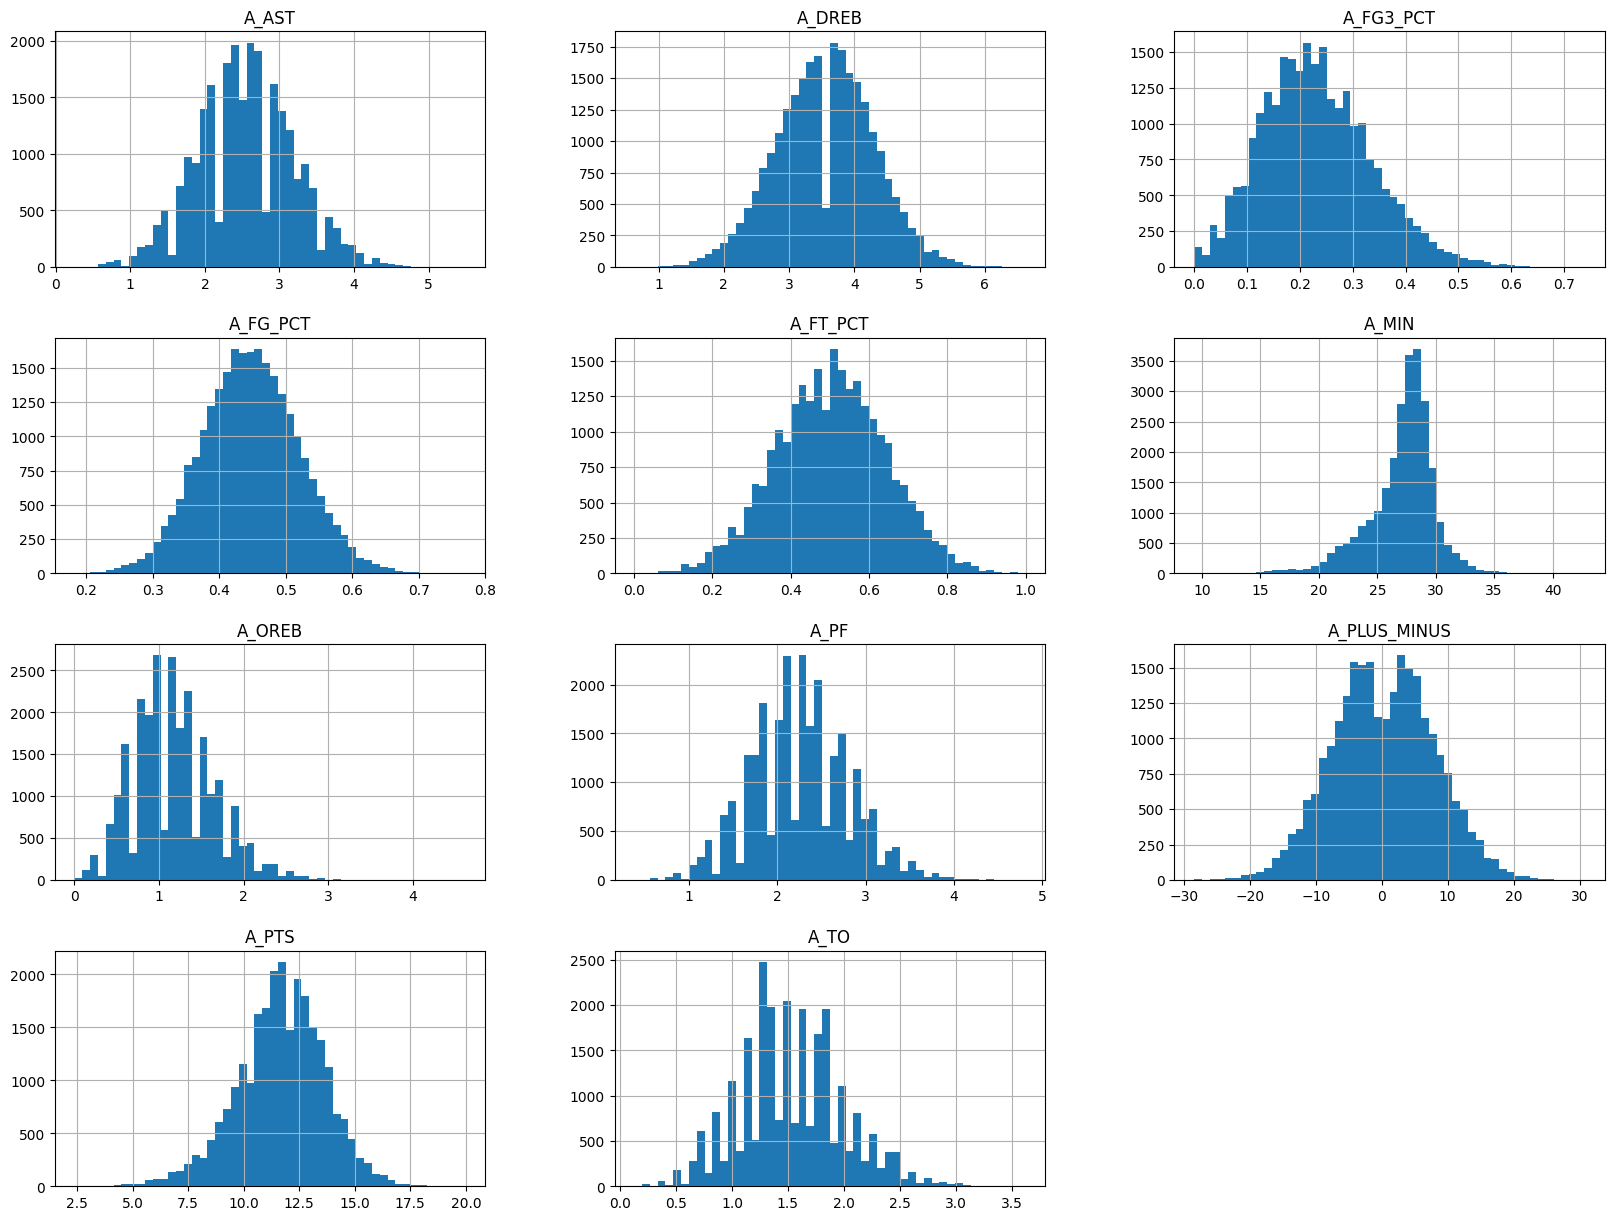

In [10]:
graph_entity(team_a_features, 50)

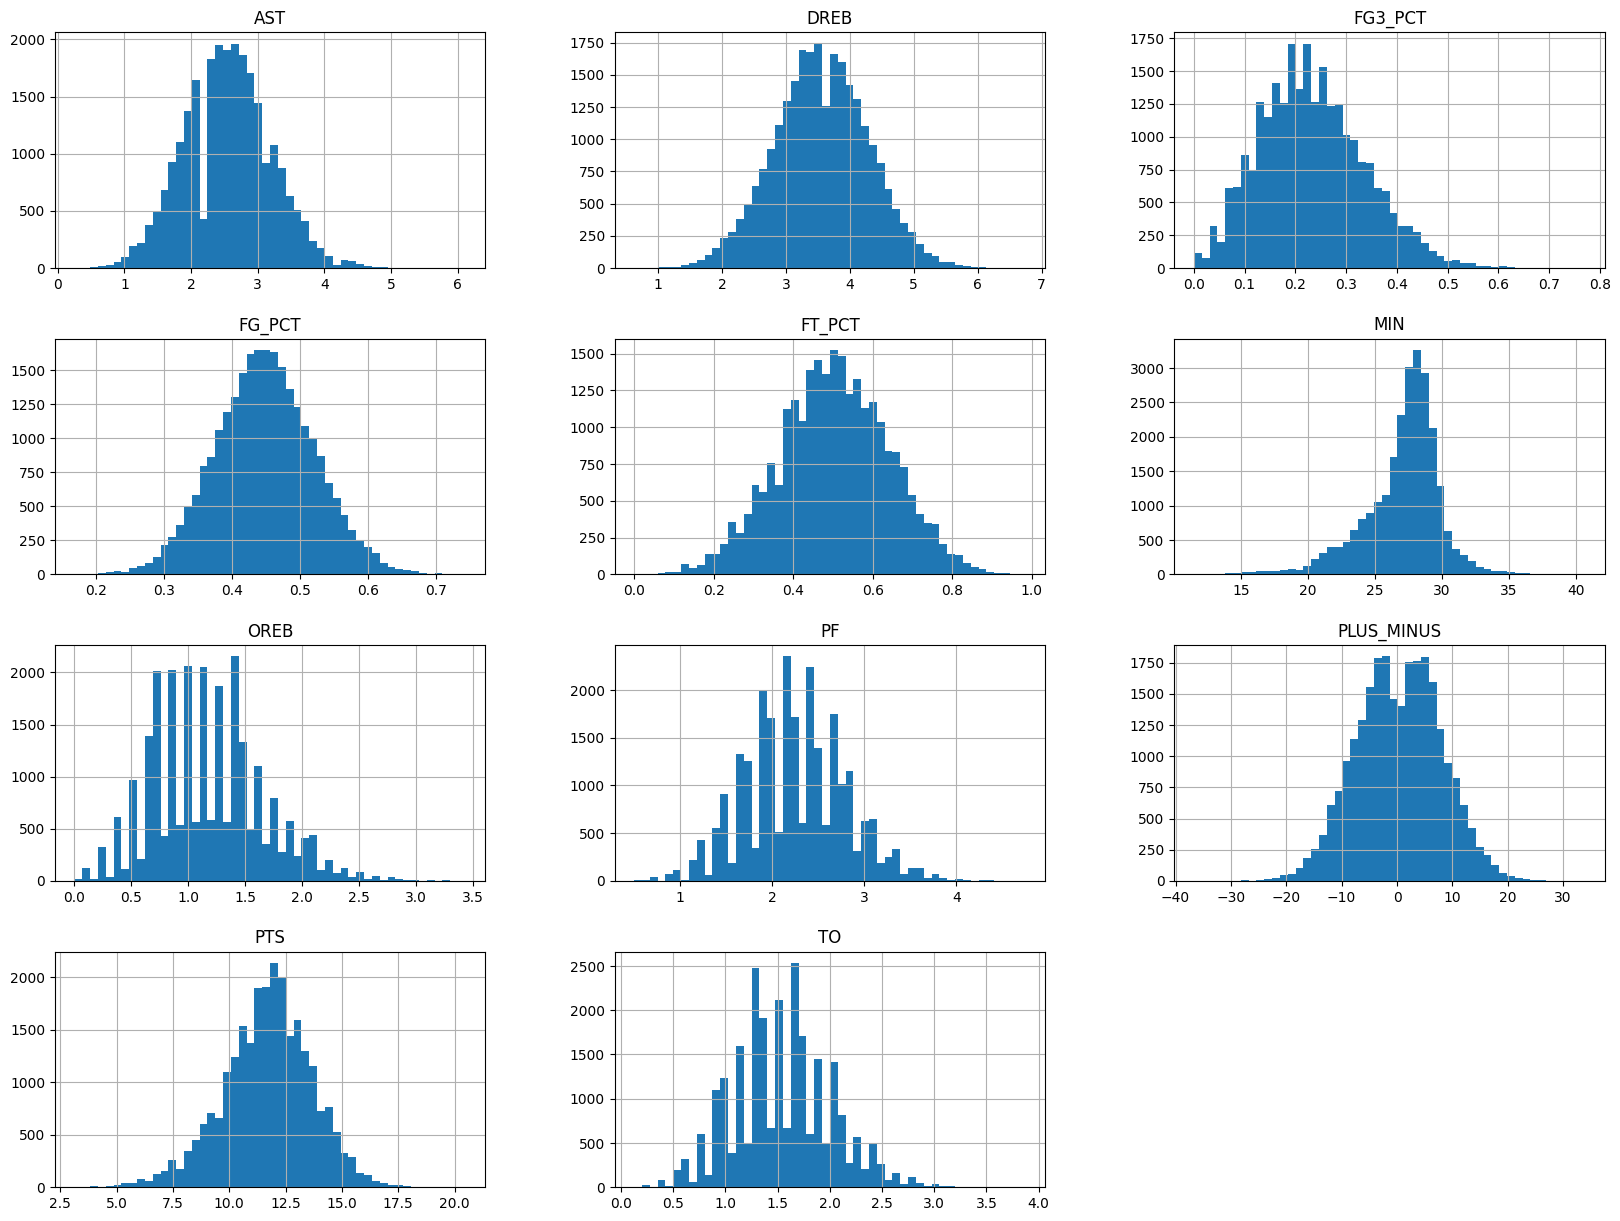

In [8]:
graph_entity(team_b_features, 50)

Random Test Cases for Dataset

In [11]:
assert all(
    col.startswith(("A_", "B_")) or col == "Team_A_Wins"
    for col in processed_dataset.features.columns
), "Unexpected columns found in the dataset."
assert processed_dataset.features["Team_A_Wins"].dtype == "int", "Team_A_Wins must be integer."

assert not processed_dataset.features.isna().any().any(), "Dataset contains missing values."
assert (
    abs(processed_dataset.features.filter(like="A_").mean().mean() - processed_dataset.features.filter(like="B_").mean().mean())
    < .1
), "Team A and Team B feature distributions are significantly different."
min_columns = [col for col in processed_dataset.features.columns if col.endswith("_MIN")]
assert processed_dataset.features[min_columns].min().min() >= 0, "Negative MIN values detected."

Feature Importance Analysis

In [5]:
Y = processed_dataset.features["Team_A_Wins"]
X = pd.concat([team_a_features, team_b_features], axis=1)
rf_params = {"n_estimators": 100, "random_state": 42}

In [12]:
feature_ranking = train_random_forest_and_rank_features(X, Y, rf_params)

print(feature_ranking)

         Feature  Importance
8   A_PLUS_MINUS    0.057449
19  B_PLUS_MINUS    0.054121
14      B_FG_PCT    0.053173
16         B_MIN    0.052343
3       A_FG_PCT    0.051330
5          A_MIN    0.051105
4       A_FT_PCT    0.050771
2      A_FG3_PCT    0.050406
13     B_FG3_PCT    0.050402
15      B_FT_PCT    0.050132
9          A_PTS    0.044487
20         B_PTS    0.044315
1         A_DREB    0.041125
12        B_DREB    0.040760
11         B_AST    0.039502
0          A_AST    0.039411
7           A_PF    0.038843
6         A_OREB    0.038696
18          B_PF    0.038420
21          B_TO    0.038369
10          A_TO    0.037899
17        B_OREB    0.036940


Correlation Analysis

Correlation Matrix (method=pearson):
                  A_AST    A_DREB  A_FG3_PCT  A_FG_PCT  A_FT_PCT     A_MIN  \
A_AST         1.000000  0.242169   0.290665  0.390236  0.017894  0.293238   
A_DREB        0.242169  1.000000   0.060929  0.058668  0.093652  0.491359   
A_FG3_PCT     0.290665  0.060929   1.000000  0.328471 -0.041022 -0.063270   
A_FG_PCT      0.390236  0.058668   0.328471  1.000000  0.048912  0.035018   
A_FT_PCT      0.017894  0.093652  -0.041022  0.048912  1.000000  0.180470   
A_MIN         0.293238  0.491359  -0.063270  0.035018  0.180470  1.000000   
A_OREB       -0.017905  0.150561  -0.205165 -0.197155  0.075620  0.356008   
A_PF          0.061592  0.144679  -0.076598  0.019036  0.147757  0.423806   
A_PLUS_MINUS  0.368739  0.313220   0.258644  0.415621  0.085183  0.009665   
A_PTS         0.552887  0.408360   0.343333  0.469691  0.267584  0.587245   
A_TO          0.042178  0.223379  -0.028721  0.033900  0.084136  0.268459   
B_AST         0.077405  0.050575   0.0

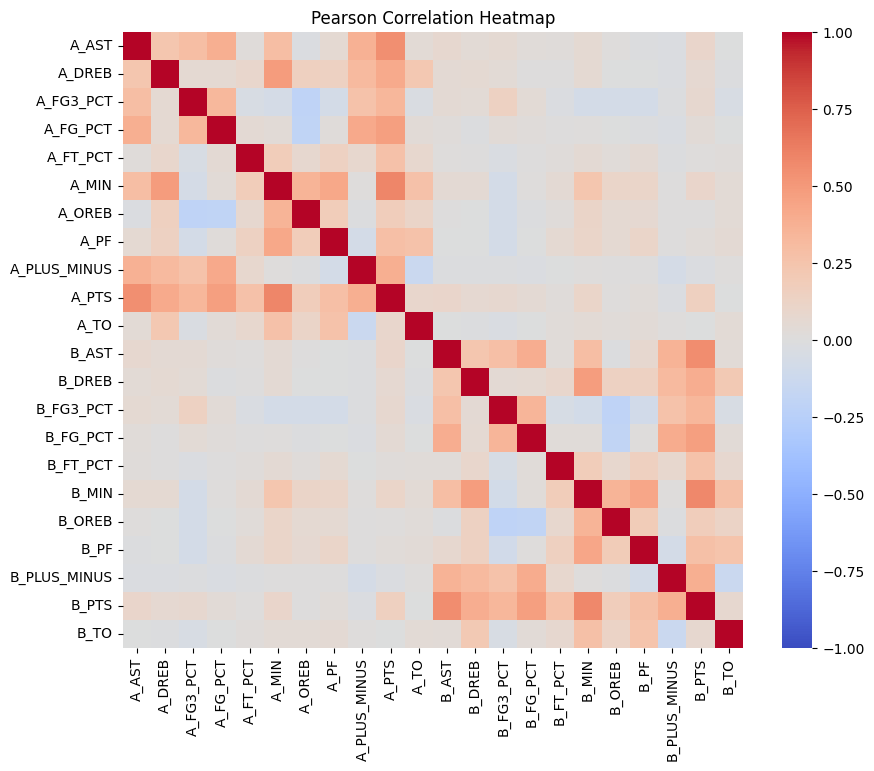

In [6]:
corr_matrix = correlation_analysis(
    X, 
    method='pearson',   # or 'spearman' / 'kendall'
    threshold=0.5,
    show_heatmap=True
)